In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# Table Content
In this jupyter notebook, we cover following plots:
1. Line Chart
1. Bar Chart (basic, grouped, stacked)
1. Scatter Plot
1. Pie Chart
1. Donut Chart
1. Polar Chart
1. Histogram
1. KDE Plot
1. Dual Axis Charts
1. Autocorrelation
1. Box Plot
1. Violin Plot
1. Heatmap

# Line Chart

In [3]:
df = pd.read_csv('data/iris.csv')
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class,Type
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


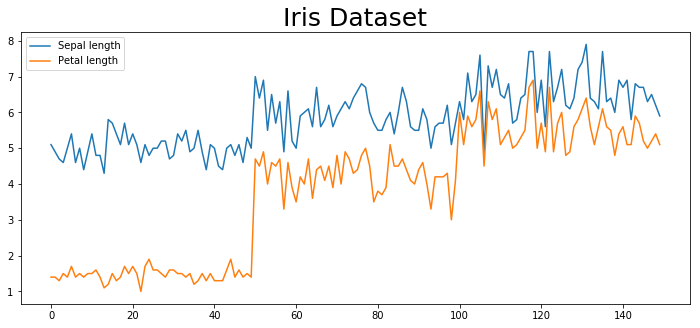

In [4]:
fig, ax = plt.subplots(figsize=(12, 5))
df[['Sepal length', 'Petal length']].plot(ax=ax)
ax.set_title('Iris Dataset', size=25)
plt.show()

# Bar Chart

In [5]:
df = pd.read_csv('data/barcharts-us-music-sales-by-genre.csv')
df.head()

,Year,Children's,Classical,Country,Jazz,New Age,Oldies,Other,Pop,R&B and Urban,Rap and Hip-Hop,Religious,Rock,Soundtracks
0,1989,0.3,3.6,7.3,4.9,1.4,0.9,4.0,15.0,9.5,6.4,3.1,41.7,0.7
1,1990,0.5,3.1,9.6,4.8,1.1,0.8,5.6,15.0,11.6,8.5,2.5,36.1,0.8
2,1991,0.3,3.2,12.8,4.0,1.3,1.0,4.2,13.7,9.9,10.0,3.8,34.8,0.7
3,1992,0.5,3.7,17.4,3.8,1.2,0.8,5.4,12.1,9.8,8.6,2.8,31.6,0.7
4,1993,0.4,3.3,18.7,3.1,1.0,1.0,4.6,11.5,10.6,9.2,3.2,30.2,0.7


In [6]:
df = df.set_index('Year')

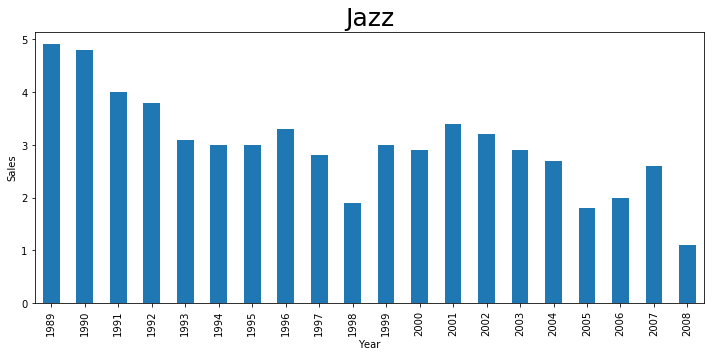

In [7]:
# Basic
fig, ax = plt.subplots(figsize=(12, 5))
df['Jazz'].plot.bar(ax=ax, color='#1F77B4')
ax.set_title('Jazz', fontsize=25)
ax.set_ylabel('Sales')
plt.show()

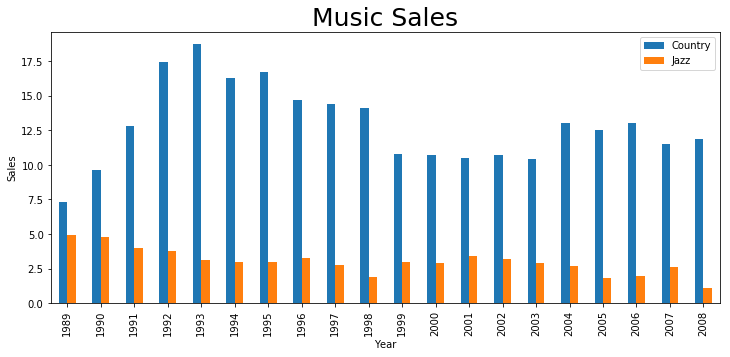

In [8]:
# Grouped
fig, ax = plt.subplots(figsize=(12, 5))
df[['Country', 'Jazz']].plot.bar(ax=ax)
ax.set_title('Music Sales', fontsize=25)
ax.set_ylabel('Sales')
plt.show()

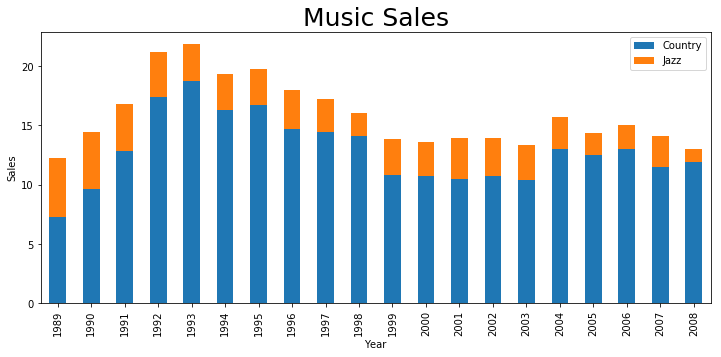

In [9]:
# Stacked
fig, ax = plt.subplots(figsize=(12, 5))
df[['Country', 'Jazz']].plot.bar(ax=ax, stacked=True)
ax.set_title('Music Sales', fontsize=25)
ax.set_ylabel('Sales')
plt.show()

# Scatter Plot

In [10]:
df = pd.read_csv('data/index.csv')
df.head()

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
0,1954,7,1,NaN,NaN,NaN,0.80,4.6,5.8,NaN
1,1954,8,1,NaN,NaN,NaN,1.22,NaN,6.0,NaN
2,1954,9,1,NaN,NaN,NaN,1.06,NaN,6.1,NaN
3,1954,10,1,NaN,NaN,NaN,0.85,8.0,5.7,NaN
4,1954,11,1,NaN,NaN,NaN,0.83,NaN,5.3,NaN


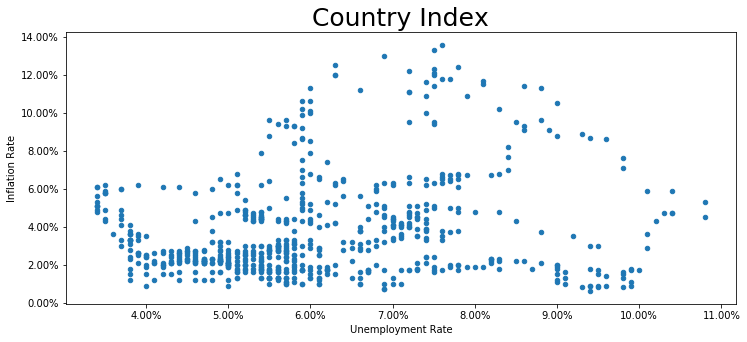

In [11]:
fig, ax = plt.subplots(figsize=(12, 5))
df.plot.scatter(ax=ax, x='Unemployment Rate',y='Inflation Rate')
ax.set_title('Country Index', fontsize=25)
ax.set_xticklabels(['{:,.2%}'.format(i/100) for i in ax.get_xticks()])
ax.set_yticklabels(['{:,.2%}'.format(i/100) for i in ax.get_yticks()])
plt.show()

# Pie Chart

In [12]:
df = pd.read_csv('data/barchart-divorcerates.csv')
df = df.set_index('Age')
df

,Women,Men
Age,,
Under 20 years,27.6,11.7
20 to 24 years,36.6,38.6
25 to 29 years,16.4,22.3
30 to 34 years,8.5,11.6
35 to 39 years,5.1,6.5


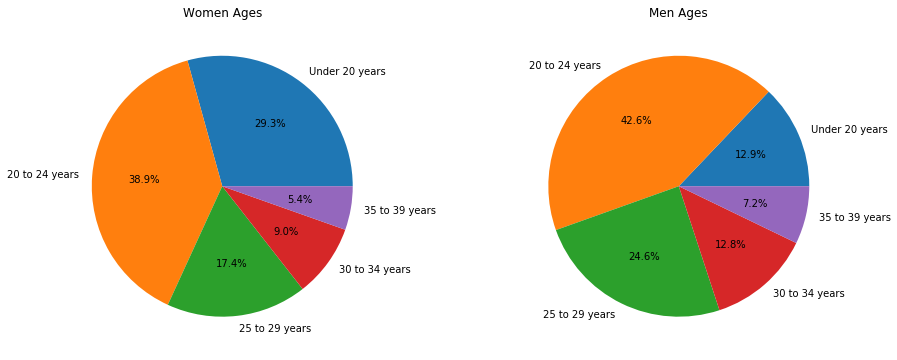

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
    
ax1 = axes.flatten()[0]
ax2 = axes.flatten()[1]

df.plot.pie(y='Women', autopct='%1.1f%%', ax=ax1, legend=None)
ax1.set_title('Women Ages')

df.plot.pie(y='Men', autopct='%1.1f%%', ax=ax2, legend=None)
ax2.set_title('Men Ages')

for ax in axes:
    ax.set_aspect('equal')
    ax.get_yaxis().set_visible(False)
    
plt.show()

# Donut Chart

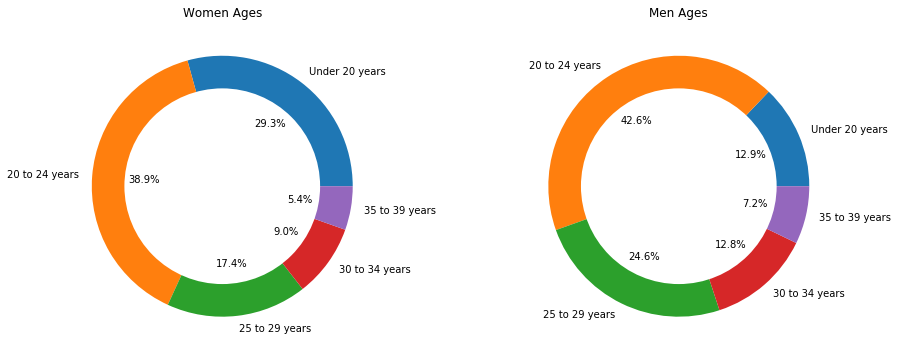

In [14]:
# Continued from last example

from matplotlib.patches import Circle

for ax in axes:
    circle = Circle((0, 0), 0.75, facecolor='white')
    ax.add_artist(circle)
    
fig

# Polar Chart

# Histogram

In [15]:
df = pd.read_csv('data/df-weed.csv')
df.head()

,Date,State,HighQ,MedQ,LowQ
0,2014-01-01,Alabama,339.06,198.64,149.49
1,2014-01-01,Alaska,288.75,260.60,388.58
2,2014-01-01,Arizona,303.31,209.35,189.45
3,2014-01-01,Arkansas,361.85,185.62,125.87
4,2014-01-01,California,248.78,193.56,192.92


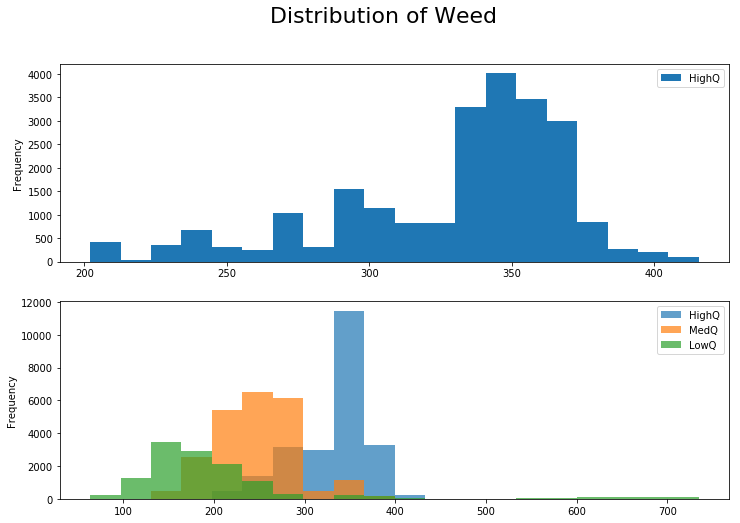

In [16]:
fig, axes = plt.subplots(figsize=(12, 8), nrows=2, ncols=1)
df['HighQ'].plot.hist(bins=20, ax=axes.flatten()[0], legend=True)
df.plot.hist(bins=20, alpha=0.7, ax=axes.flatten()[1])
fig.suptitle('Distribution of Weed', fontsize=22)
plt.show()

# KDE Plot

# Dual Axis Charts


# Autocorrelation

In [17]:
# Create data with increasing pattern with random range * 50 times

def min_max_scaling(s, a, b):
    s = np.array(s)
    s_min = s.min()
    s_max = s.max()
    return a + (s - s_min) / (s_max - s_min) * (b - a)

data = np.array([])

for i in range(50):
    s = sorted(np.random.rand(100), reverse=False)
    s = min_max_scaling(s, np.random.randint(-10, -1), np.random.randint(1, 10))
    data = np.append(data, s)

df = pd.Series(data)
df.shape

(5000,)

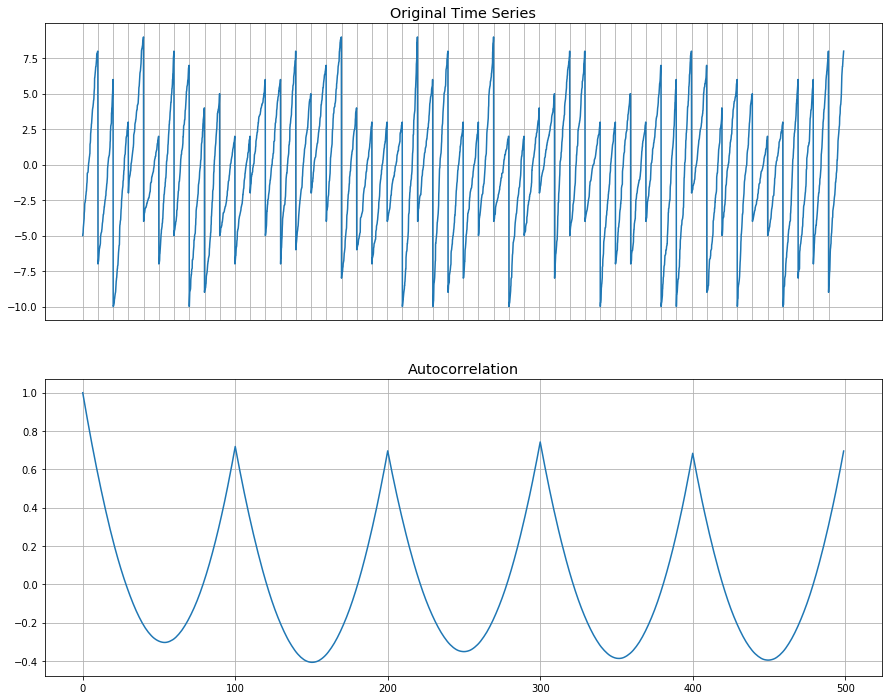

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))
ax1 = axes[0]
ax2 = axes[1]

with plt.style.context(('ggplot')):
    # First graph
    df.plot(ax=ax1)
    ax1.set_xticks(np.arange(0, df.shape[0], 100))
    ax1.set_title('Original Time Series')

    # Remove ticks but retain grid
    for tic in ax1.xaxis.get_major_ticks():
        tic.tick1On = tic.tick2On = False
        tic.label1On = tic.label2On = False

    # Second graph
    df_autocorr = pd.Series(range(500)).apply(lambda s: df.autocorr(s))
    df_autocorr.plot(ax = ax2)
    ax2.set_title('Autocorrelation')

    plt.show()

# Box Plot

# Violin Plot

# Heatmap